<a href="https://colab.research.google.com/github/costpetrides/NOx-Ozone-Relationship-Modeling-with-ML/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  K-Nearest Neighbors (KNN)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('https://raw.githubusercontent.com/costpetrides/NOx-Ozone-Relationship-Modeling-with-ML/main/DATA/Data_2.csv')
cols = df.columns.tolist()
df.head()

,City,PM2.5,PM10,NOx,NH3,CO,SO2,O3
0,0,48.57,95.68,17.15,15.85,0.92,27.64,133.36
1,0,48.57,95.68,16.46,15.85,0.97,24.55,34.06
2,0,48.57,95.68,29.70,15.85,17.40,29.07,30.70
3,0,48.57,95.68,17.97,15.85,1.70,18.59,36.08
4,0,48.57,95.68,37.76,15.85,22.10,39.33,39.31


Best n_neighbors: 8
Best Validation Mean Squared Error: 232.54049315915518
Custom Regression Report:
Mean Absolute Error: 10.30
Mean Squared Error: 238.42
R-squared (R2): 0.43


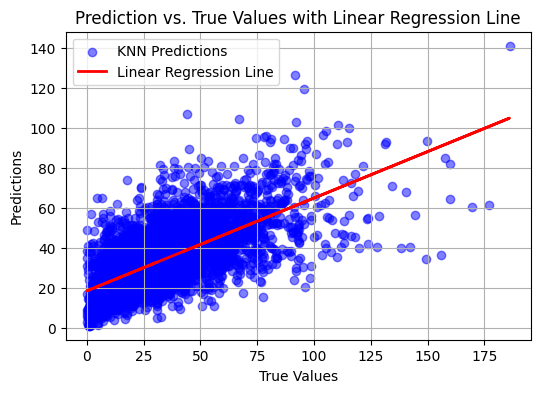

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

# Shuffle and split data
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
train, temp = train_test_split(df, test_size=0.4, random_state=42)
valid, test = train_test_split(temp, test_size=0.5, random_state=42)

# Preprocess data
def preprocess_data(dataframe):
    x = dataframe.iloc[:, :-1].values
    y = dataframe.iloc[:, -1].values
    return x, y

train_x, train_y = preprocess_data(train)
valid_x, valid_y = preprocess_data(valid)
test_x, test_y = preprocess_data(test)

# Standardize features
scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)
valid_x = scaler.transform(valid_x)
test_x = scaler.transform(test_x)

# Define and tune model using GridSearchCV
param_grid = {'n_neighbors': range(1, 21)}
knn = KNeighborsRegressor()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(train_x, train_y)

# Best parameters and model
best_n_neighbors = grid_search.best_params_['n_neighbors']
best_knn_model = grid_search.best_estimator_

print(f"Best n_neighbors: {best_n_neighbors}")
print(f"Best Validation Mean Squared Error: {-grid_search.best_score_}")

# Predict and evaluate on test set
pred_y = best_knn_model.predict(test_x)
mae = mean_absolute_error(test_y, pred_y)
mse = mean_squared_error(test_y, pred_y)
r2 = r2_score(test_y, pred_y)

print("Custom Regression Report:")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Fit a linear regression model for plotting
lin_reg = LinearRegression()
lin_reg.fit(test_y.reshape(-1, 1), pred_y)
pred_line = lin_reg.predict(test_y.reshape(-1, 1))

# Plotting
plt.figure(figsize=(6, 4))
plt.scatter(test_y, pred_y, alpha=0.5, color='blue', label='KNN Predictions')
plt.plot(test_y, pred_line, color='red', linewidth=2, label='Linear Regression Line')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Prediction vs. True Values with Linear Regression Line')
plt.legend()
plt.grid(True)
plt.show()
